In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


세션 다시 시작

In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [3]:
!pip install google-colab-selenium lxml pandas

In [4]:
import google_colab_selenium as gs
from lxml import html

# 학생 게시판 이동 및 페이지 다운로드
def get_page(driver, url):
    driver.get(url)
    page_content = driver.page_source
    tree = html.fromstring(page_content)
    return tree

# XPath를 이용하여 게시판의 제목 추출 함수
def extract_titles(tree):
    titles = tree.xpath('//td[@class="td-subject"]/a/strong/text()')
    return titles

# 제목의 리스트를 출력
def print_titles(titles):
    for title in titles:
        print(title)

# 셀레니움의 크롬 드라이버 설치 및 실행
driver = gs.Chrome()

# 컴퓨터과학과 학생 게시판 이동 및 페이지 다운로드
board_name = '컴퓨터과학과'
board_url = 'https://cs.knou.ac.kr/cs1/4794/subview.do'
tree = get_page(driver, board_url)
titles = extract_titles(tree)
print_titles(titles)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

연극 배우 및 스텝 모집중
연극 배우 및 스텝 모집중
연극 배우 및 스텝 모집중
🍀학사공지 전용 단톡방 / 🍀크로바 네이버 카페 / 🍀25학번 신편입생 필독사항 
[그로스로그] 3기 3차 OT는 3월 3일 (일) 14:00에 신논현역에서 열립니다!
연극 배우 및 스텝 모집중
연극 배우 및 스텝 모집중
연극 배우 및 스텝 모집중
또 질문있습니다
질문이있습니다...


In [5]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd


# 다음 페이지로 이동하는 함수
def move_to_next_page(driver):
    next_page_link = driver.find_element(By.CLASS_NAME, "_listNext")
    if next_page_link and next_page_link.is_enabled():
        next_page_link.click()
        # 페이지 로딩 대기 (최대 10초)
        WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CLASS_NAME, "board-table"))  # 페이지 로드 확인 요소
        )
        page_content = driver.page_source
        tree = html.fromstring(page_content)
        return tree
    else:
        return None

# 여러 페이지의 게시글 제목 추출 함수
def get_board_titles(url, pages, verbose=False):
    driver = gs.Chrome()  # Chrome 드라이버 실행
    board_titles = []
    for page in pages:
        if verbose:
          print(f"=== 페이지 {page} 처리중입니다. ===")
        if page == 1:
            tree = get_page(driver, url)
        else:
            tree = move_to_next_page(driver)
        if tree is not None:
            titles = extract_titles(tree)
            board_titles.extend(titles)
            if verbose:
              print_titles(titles)
    driver.quit()  # Chrome 드라이버 종료
    return board_titles

# 컴퓨터과학과 학생 게시판 이동 및 페이지 다운로드
board_name = '컴퓨터과학과'
board_url = 'https://cs.knou.ac.kr/cs1/4794/subview.do'
# 10페이지 제목 수집
board_titles = get_board_titles(url=board_url, pages=range(1,11), verbose=True)
# cs_df에 저장
cs_df = pd.DataFrame(data = {'제목': board_titles})

<IPython.core.display.Javascript object>

=== 페이지 1 처리중입니다. ===
연극 배우 및 스텝 모집중
연극 배우 및 스텝 모집중
연극 배우 및 스텝 모집중
🍀학사공지 전용 단톡방 / 🍀크로바 네이버 카페 / 🍀25학번 신편입생 필독사항 
[그로스로그] 3기 3차 OT는 3월 3일 (일) 14:00에 신논현역에서 열립니다!
연극 배우 및 스텝 모집중
연극 배우 및 스텝 모집중
연극 배우 및 스텝 모집중
또 질문있습니다
질문이있습니다...
=== 페이지 2 처리중입니다. ===
3월 수강일정 안내
RE:질문이있습니다...
연극 배우 및 스텝 모집중
2025년 극예술연구회 신입회원 모집(연극동아리)
전공교재 팝니다
RE:전공교재 팝니다( 구입희망합니다.)
RE:RE:전공교재 팝니다( 거래완료)
2025년 극예술연구회 신입회원 모집(연극동아리)
2025년 극예술연구회 신입회원 모집(연극동아리)
[그로스로그] 3기 2차 OT는 2월21일(금) 19:30에 공덕역에서 열립니다!
=== 페이지 3 처리중입니다. ===
2025년 극예술연구회 신입회원 모집
서울지역 컴퓨터과학과 공식 카카오채팅방 강퇴 규정에 대해 문의드립니다.
2025년 극예술연구회 신입회원 모집
2025 방송대 합창단 신입단원 모집 
2025년 극예술연구회 신입회원 모집
2025년 극예술연구회 신입회원 모집
2025년 극예술연구회 신입회원 모집
방송대 난타동아리 두드림 회원 을 모십니다 
구매- 파이썬프로그래밍 기초
[그로스로그] 개발자 커뮤니티 3기 신입회원을 모집합니다! 
=== 페이지 4 처리중입니다. ===
안녕하세요 컴퓨터과학 적인 질문을 올려보려합니다. CPU 스케줄링 SRT관련입니다.
재미나이의 답으로 드립니다.
2025년 극예술연구회 신입회원 모집
쌍용교육센터(강남)_교육과정 홍보 게시
2025년 극예술연구회 신입회원 모집
교재 팝니다.
[SW기술협] 2025년도 SW 개발자 채용연계교육 분당교육센터 
[한국인식산업(주) 솔루션 A/S 담당사원 모집]
2025학년도 1학기 수강신청 신, 구 시스템 병행운영 안내
2025학년도 

In [6]:
cs_df

,제목
0,연극 배우 및 스텝 모집중
1,연극 배우 및 스텝 모집중
2,연극 배우 및 스텝 모집중
3,🍀학사공지 전용 단톡방 / 🍀크로바 네이버 카페 / 🍀25학번 신편입생 필독사항
4,[그로스로그] 3기 3차 OT는 3월 3일 (일) 14:00에 신논현역에서 열립니다!
...,...
95,2024 AI보안 기술개발 교육과정 교육생 모집
96,제22회 임베디드 소프트웨어 경진대회
97,[KISIA] 2024년도 정보보호 취업박람회 안내
98,♠터링(볼링+컬링을 안방놀이 화)체험 초대~(1365 봉사 2시간/양천구 마을축제)...


In [7]:
import re

def clean_text(text):
    """
    주어진 텍스트에서 특수문자, HTML 태그 등을 제거하고 소문자로 변환하는 함수
    """
    if isinstance(text, str): # 문자열인 경우에만 정제
       # 1. 특수문자 제거
       text = re.sub(r'[^a-zA-Z0-9가-힣\s]', '', text)

       # 2. HTML 태그 제거
       text = re.sub(r'<[^>]*>', '', text)

       # 3. 대소문자 통일
       text = text.lower()
       return text
    else:
        return "" # 문자열이 아닌 경우 빈 문자열 반환

def clean_df(df):
  # DataFrame에 clean_text 함수 적용 (파일 로드 성공 시)
  if not df.empty:
      df['정제된 제목'] = df['제목'].apply(clean_text)

clean_df(cs_df)
cs_df

,제목,정제된 제목
0,연극 배우 및 스텝 모집중,연극 배우 및 스텝 모집중
1,연극 배우 및 스텝 모집중,연극 배우 및 스텝 모집중
2,연극 배우 및 스텝 모집중,연극 배우 및 스텝 모집중
3,🍀학사공지 전용 단톡방 / 🍀크로바 네이버 카페 / 🍀25학번 신편입생 필독사항,학사공지 전용 단톡방 크로바 네이버 카페 25학번 신편입생 필독사항
4,[그로스로그] 3기 3차 OT는 3월 3일 (일) 14:00에 신논현역에서 열립니다!,그로스로그 3기 3차 ot는 3월 3일 일 1400에 신논현역에서 열립니다
...,...,...
95,2024 AI보안 기술개발 교육과정 교육생 모집,2024 ai보안 기술개발 교육과정 교육생 모집
96,제22회 임베디드 소프트웨어 경진대회,제22회 임베디드 소프트웨어 경진대회
97,[KISIA] 2024년도 정보보호 취업박람회 안내,kisia 2024년도 정보보호 취업박람회 안내
98,♠터링(볼링+컬링을 안방놀이 화)체험 초대~(1365 봉사 2시간/양천구 마을축제)...,터링볼링컬링을 안방놀이 화체험 초대1365 봉사 2시간양천구 마을축제 05


In [8]:
!pip install kiwipiepy

In [9]:
from kiwipiepy import Kiwi

kiwi = Kiwi()
kiwi.add_user_word('방송대', 'NNP')
kiwi.add_user_word('방통대', 'NNP')

def analyze_morphemes(text):
    """
    주어진 텍스트를 형태소 분석하고, 각 형태소와 품사를 반환하는 함수
    """
    if isinstance(text, str): # 문자열인 경우에만 분석
       result = kiwi.analyze(text)

       morphemes = []
       for token in result[0][0]: # 첫 번째 분석 결과의 첫 번째 문장을 가져옴
            morphemes.append((token.form, token.tag))
       return morphemes
    else:
        return []

def pos_df(df):
  # DataFrame에 형태소 분석 함수 적용
  if not df.empty:
      df['형태소 분석 결과'] = df['정제된 제목'].apply(analyze_morphemes)

pos_df(cs_df)
cs_df

,제목,정제된 제목,형태소 분석 결과
0,연극 배우 및 스텝 모집중,연극 배우 및 스텝 모집중,"[(연극, NNG), (배우, NNG), (및, MAG), (스텝, NNG), (모..."
1,연극 배우 및 스텝 모집중,연극 배우 및 스텝 모집중,"[(연극, NNG), (배우, NNG), (및, MAG), (스텝, NNG), (모..."
2,연극 배우 및 스텝 모집중,연극 배우 및 스텝 모집중,"[(연극, NNG), (배우, NNG), (및, MAG), (스텝, NNG), (모..."
3,🍀학사공지 전용 단톡방 / 🍀크로바 네이버 카페 / 🍀25학번 신편입생 필독사항,학사공지 전용 단톡방 크로바 네이버 카페 25학번 신편입생 필독사항,"[(학사, NNG), (공지, NNG), (전용, NNG), (단톡방, NNG), ..."
4,[그로스로그] 3기 3차 OT는 3월 3일 (일) 14:00에 신논현역에서 열립니다!,그로스로그 3기 3차 ot는 3월 3일 일 1400에 신논현역에서 열립니다,"[(그, MM), (로스, NNG), (로, JKB), (그, MM), (3, SN..."
...,...,...,...
95,2024 AI보안 기술개발 교육과정 교육생 모집,2024 ai보안 기술개발 교육과정 교육생 모집,"[(2024, SN), (ai, SL), (보안, NNG), (기술, NNG), (..."
96,제22회 임베디드 소프트웨어 경진대회,제22회 임베디드 소프트웨어 경진대회,"[(제, XPN), (22, SN), (회, NNB), (임베디드, NNP), (소..."
97,[KISIA] 2024년도 정보보호 취업박람회 안내,kisia 2024년도 정보보호 취업박람회 안내,"[(kisia, SL), (2024, SN), (년, NNB), (도, JX), (..."
98,♠터링(볼링+컬링을 안방놀이 화)체험 초대~(1365 봉사 2시간/양천구 마을축제)...,터링볼링컬링을 안방놀이 화체험 초대1365 봉사 2시간양천구 마을축제 05,"[(터, NNG), (링, NNG), (볼링, NNG), (컬링, NNG), (을,..."


In [10]:
def extract_nouns(morphemes):
  """
  형태소 분석 결과에서 명사만 추출하는 함수
  """
  nouns = [word for word, tag in morphemes if tag in ['NNG', 'NNP']]
  return nouns


def noun_df(df):
  # 동사, 명사 추출 및 단어 목록 생성
  if not df.empty:
      df['명사'] = df['형태소 분석 결과'].apply(extract_nouns)

noun_df(cs_df)
cs_df

,제목,정제된 제목,형태소 분석 결과,명사
0,연극 배우 및 스텝 모집중,연극 배우 및 스텝 모집중,"[(연극, NNG), (배우, NNG), (및, MAG), (스텝, NNG), (모...","[연극, 배우, 스텝, 모집]"
1,연극 배우 및 스텝 모집중,연극 배우 및 스텝 모집중,"[(연극, NNG), (배우, NNG), (및, MAG), (스텝, NNG), (모...","[연극, 배우, 스텝, 모집]"
2,연극 배우 및 스텝 모집중,연극 배우 및 스텝 모집중,"[(연극, NNG), (배우, NNG), (및, MAG), (스텝, NNG), (모...","[연극, 배우, 스텝, 모집]"
3,🍀학사공지 전용 단톡방 / 🍀크로바 네이버 카페 / 🍀25학번 신편입생 필독사항,학사공지 전용 단톡방 크로바 네이버 카페 25학번 신편입생 필독사항,"[(학사, NNG), (공지, NNG), (전용, NNG), (단톡방, NNG), ...","[학사, 공지, 전용, 단톡방, 크로바, 네이버, 카페, 학번, 신, 편입, 필독,..."
4,[그로스로그] 3기 3차 OT는 3월 3일 (일) 14:00에 신논현역에서 열립니다!,그로스로그 3기 3차 ot는 3월 3일 일 1400에 신논현역에서 열립니다,"[(그, MM), (로스, NNG), (로, JKB), (그, MM), (3, SN...","[로스, 기, 신논현역]"
...,...,...,...,...
95,2024 AI보안 기술개발 교육과정 교육생 모집,2024 ai보안 기술개발 교육과정 교육생 모집,"[(2024, SN), (ai, SL), (보안, NNG), (기술, NNG), (...","[보안, 기술, 개발, 교육, 과정, 교육, 모집]"
96,제22회 임베디드 소프트웨어 경진대회,제22회 임베디드 소프트웨어 경진대회,"[(제, XPN), (22, SN), (회, NNB), (임베디드, NNP), (소...","[임베디드, 소프트웨어, 경진, 대회]"
97,[KISIA] 2024년도 정보보호 취업박람회 안내,kisia 2024년도 정보보호 취업박람회 안내,"[(kisia, SL), (2024, SN), (년, NNB), (도, JX), (...","[정보, 보호, 취업, 박람회, 안내]"
98,♠터링(볼링+컬링을 안방놀이 화)체험 초대~(1365 봉사 2시간/양천구 마을축제)...,터링볼링컬링을 안방놀이 화체험 초대1365 봉사 2시간양천구 마을축제 05,"[(터, NNG), (링, NNG), (볼링, NNG), (컬링, NNG), (을,...","[터, 링, 볼링, 컬링, 안방, 놀이, 체험, 초대, 봉사, 양천구, 마을, 축제]"


In [11]:
def preprocessing_df(df):
  clean_df(df)
  pos_df(df)
  noun_df(df)

preprocessing_df(cs_df)
cs_df

,제목,정제된 제목,형태소 분석 결과,명사
0,연극 배우 및 스텝 모집중,연극 배우 및 스텝 모집중,"[(연극, NNG), (배우, NNG), (및, MAG), (스텝, NNG), (모...","[연극, 배우, 스텝, 모집]"
1,연극 배우 및 스텝 모집중,연극 배우 및 스텝 모집중,"[(연극, NNG), (배우, NNG), (및, MAG), (스텝, NNG), (모...","[연극, 배우, 스텝, 모집]"
2,연극 배우 및 스텝 모집중,연극 배우 및 스텝 모집중,"[(연극, NNG), (배우, NNG), (및, MAG), (스텝, NNG), (모...","[연극, 배우, 스텝, 모집]"
3,🍀학사공지 전용 단톡방 / 🍀크로바 네이버 카페 / 🍀25학번 신편입생 필독사항,학사공지 전용 단톡방 크로바 네이버 카페 25학번 신편입생 필독사항,"[(학사, NNG), (공지, NNG), (전용, NNG), (단톡방, NNG), ...","[학사, 공지, 전용, 단톡방, 크로바, 네이버, 카페, 학번, 신, 편입, 필독,..."
4,[그로스로그] 3기 3차 OT는 3월 3일 (일) 14:00에 신논현역에서 열립니다!,그로스로그 3기 3차 ot는 3월 3일 일 1400에 신논현역에서 열립니다,"[(그, MM), (로스, NNG), (로, JKB), (그, MM), (3, SN...","[로스, 기, 신논현역]"
...,...,...,...,...
95,2024 AI보안 기술개발 교육과정 교육생 모집,2024 ai보안 기술개발 교육과정 교육생 모집,"[(2024, SN), (ai, SL), (보안, NNG), (기술, NNG), (...","[보안, 기술, 개발, 교육, 과정, 교육, 모집]"
96,제22회 임베디드 소프트웨어 경진대회,제22회 임베디드 소프트웨어 경진대회,"[(제, XPN), (22, SN), (회, NNB), (임베디드, NNP), (소...","[임베디드, 소프트웨어, 경진, 대회]"
97,[KISIA] 2024년도 정보보호 취업박람회 안내,kisia 2024년도 정보보호 취업박람회 안내,"[(kisia, SL), (2024, SN), (년, NNB), (도, JX), (...","[정보, 보호, 취업, 박람회, 안내]"
98,♠터링(볼링+컬링을 안방놀이 화)체험 초대~(1365 봉사 2시간/양천구 마을축제)...,터링볼링컬링을 안방놀이 화체험 초대1365 봉사 2시간양천구 마을축제 05,"[(터, NNG), (링, NNG), (볼링, NNG), (컬링, NNG), (을,...","[터, 링, 볼링, 컬링, 안방, 놀이, 체험, 초대, 봉사, 양천구, 마을, 축제]"


In [12]:
from collections import Counter

def get_word_count(df):
    # 단어 빈도 계산
    if not df.empty:
        all_nouns = df['명사'].sum()
        return Counter(all_nouns)

word_count = get_word_count(cs_df)
print("단어 빈도:")
for word, freq in word_count.most_common(30):
    print(f"{word}: {freq}")

단어 빈도:
모집: 35
교육: 14
안내: 13
신입: 13
회원: 13
컴퓨터: 12
연극: 11
극예술연구회: 11
학기: 9
과학: 8
배우: 7
스텝: 7
동아리: 7
교재: 7
취업: 7
기: 6
학년도: 6
지원: 6
사업: 6
프로그래밍: 5
과정: 5
지역: 5
공지: 4
질문: 4
수강: 4
방송대: 4
개발자: 4
홍보: 4
산업: 4
시스템: 4


In [13]:
!pip install wordcloud matplotlib

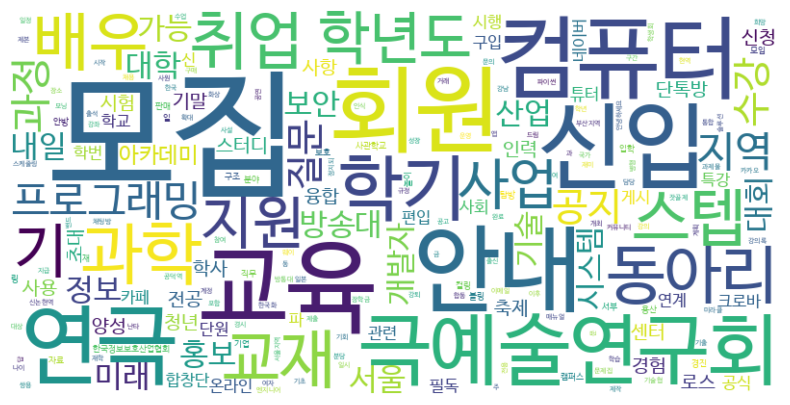

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(word_count):
    # WordCloud 생성
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white', # 배경색 설정
        colormap='viridis',  # 색상 설정
        font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        ).generate_from_frequencies(word_count) # frequencies를 넣어줍니다.

    # matplotlib을 사용하여 시각화
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")  # 축 제거
    plt.show()

word_count = get_word_count(cs_df)
create_wordcloud(word_count)

<IPython.core.display.Javascript object>

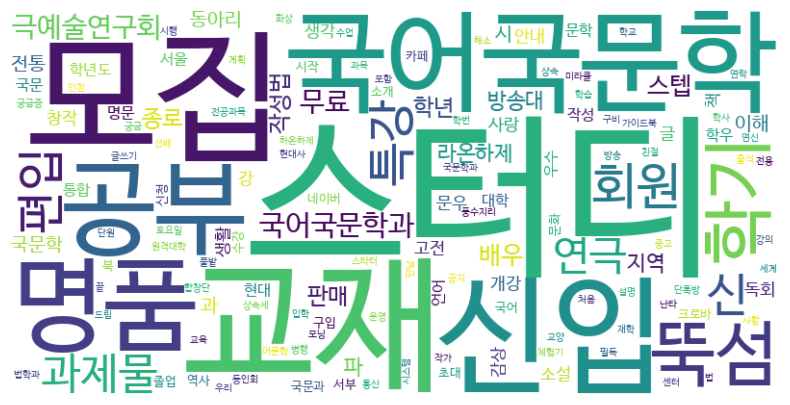

In [15]:
# 국어국문학과 학생 게시판 이동 및 페이지 다운로드
board_name = '국어국문학과'
board_url = 'https://korean.knou.ac.kr/korean/5323/subview.do'
# 10페이지 제목 수집
board_titles = get_board_titles(url=board_url, pages=range(1,11), verbose=False)
# ko_df에 저장
ko_df = pd.DataFrame(data = {'제목': board_titles})
# 전처리
preprocessing_df(ko_df)
word_count = get_word_count(ko_df)
create_wordcloud(word_count)

<IPython.core.display.Javascript object>

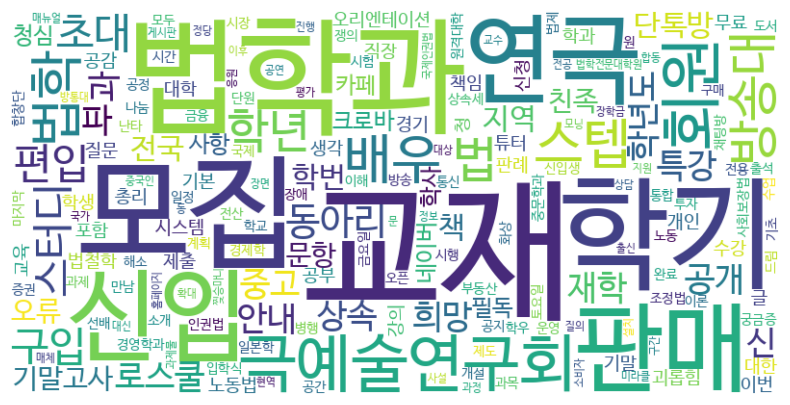

In [16]:
# 법학과 학생 게시판 이동 및 페이지 다운로드
board_name = '법학과'
board_url = 'https://law.knou.ac.kr/law/5176/subview.do'
# 10페이지 제목 수집
board_titles = get_board_titles(url=board_url, pages=range(1,11), verbose=False)
# ko_df에 저장
law_df = pd.DataFrame(data = {'제목': board_titles})
# 전처리
preprocessing_df(law_df)
word_count = get_word_count(law_df)
create_wordcloud(word_count)

In [17]:
!pip install vllm

In [18]:
# vllm 으로 LGAI-EXAONE/EXAONE-3.5-2.4B-Instruct 모델 로드
from vllm import LLM

llm = LLM(
    model="LGAI-EXAONE/EXAONE-3.5-2.4B-Instruct",
    tensor_parallel_size=1,  # GPU 개수에 따라 조정
    dtype="half",  # 메모리 절약을 위해 half precision 사용
    gpu_memory_utilization=0.9  # GPU 메모리 사용률
)

INFO 03-02 18:23:21 __init__.py:207] Automatically detected platform cuda.


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


INFO 03-02 18:23:23 config.py:2444] Downcasting torch.float32 to torch.float16.
INFO 03-02 18:23:39 config.py:549] This model supports multiple tasks: {'classify', 'embed', 'reward', 'score', 'generate'}. Defaulting to 'generate'.
INFO 03-02 18:23:39 llm_engine.py:234] Initializing a V0 LLM engine (v0.7.3) with config: model='LGAI-EXAONE/EXAONE-3.5-2.4B-Instruct', speculative_config=None, tokenizer='LGAI-EXAONE/EXAONE-3.5-2.4B-Instruct', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=32768, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto,  device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='xgrammar'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=

Loading safetensors checkpoint shards:   0% Completed | 0/2 [00:00<?, ?it/s]


INFO 03-02 18:24:29 model_runner.py:1115] Loading model weights took 4.5145 GB
INFO 03-02 18:24:37 worker.py:267] Memory profiling takes 7.22 seconds
INFO 03-02 18:24:37 worker.py:267] the current vLLM instance can use total_gpu_memory (14.74GiB) x gpu_memory_utilization (0.90) = 13.27GiB
INFO 03-02 18:24:37 worker.py:267] model weights take 4.51GiB; non_torch_memory takes 0.05GiB; PyTorch activation peak memory takes 2.49GiB; the rest of the memory reserved for KV Cache is 6.21GiB.
INFO 03-02 18:24:37 executor_base.py:111] # cuda blocks: 5428, # CPU blocks: 3495
INFO 03-02 18:24:37 executor_base.py:116] Maximum concurrency for 32768 tokens per request: 2.65x
INFO 03-02 18:24:44 model_runner.py:1434] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI. If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_util

Capturing CUDA graph shapes: 100%|██████████| 35/35 [01:12<00:00,  2.09s/it]

INFO 03-02 18:25:57 model_runner.py:1562] Graph capturing finished in 73 secs, took 0.21 GiB
INFO 03-02 18:25:57 llm_engine.py:436] init engine (profile, create kv cache, warmup model) took 87.75 seconds


In [19]:
from vllm import SamplingParams

sampling_params = SamplingParams(
    temperature=0.3,  # 창의성 (0.1~1.0)
    top_p=1.0,        # nucleus sampling
    max_tokens=512,   # 최대 출력 토큰 수
    frequency_penalty=0.5  # 반복 패널티
)

def format_prompt(user_input: str) -> str:
    messages = [
        {"role": "system", "content": "You are EXAONE model from LG AI Research, a helpful assistant."},
        {"role": "user", "content": user_input}
    ]
    return messages

In [20]:
# 질문 생성
prompt = format_prompt("대한민국의 수도는 어디인가요? 수도에 여행하러간다면 어떤 즐길거리가 있을까요?")

# 추론 수행
outputs = llm.chat(prompt, sampling_params)

# 결과 출력
print("\n생성된 텍스트:", outputs[0].outputs[0].text)

INFO 03-02 18:25:57 chat_utils.py:332] Detected the chat template content format to be 'string'. You can set `--chat-template-content-format` to override this.


Processed prompts: 100%|██████████| 1/1 [00:19<00:00, 19.21s/it, est. speed input: 2.97 toks/s, output: 20.67 toks/s]


생성된 텍스트: 대한민국의 수도는 **서울**입니다. 서울은 역사적 유적지와 현대적인 문화 시설이 공존하는 매력적인 도시로, 다양한 여행 즐길거리를 제공합니다:

1. **역사 유적지**:
   - **경복궁**: 조선 시대의 궁궐로, 아름다운 정원과 전통 건축물을 감상할 수 있습니다.
   - **인사동**: 전통 공예품과 예술 작품을 구경하고 구매할 수 있는 곳입니다.
   - **북촌 한옥마을**: 전통 한옥들이 잘 보존되어 있어 한국의 옛 모습을 체험할 수 있습니다.

2. **현대 문화 및 엔터테인먼트**:
   - **롯데월드타워**: 서울의 랜드마크로, 전망대에서 서울 시내 전경을 감상하거나 다양한 테마파크를 즐길 수 있습니다.
   - **국립중앙박물관 및 국립현대미술관**: 세계적인 미술 작품과 한국의 역사 유물들을 관람할 수 있습니다.
   - **홍대 문화 거리**: 젊은 예술가들의 창작 활동이 활발한 지역으로, 음악 공연과 예술 전시회를 즐길 수 있습니다.

3. **쇼핑 및 미식**:
   - **명동 및 동대문 디자인 플라자(DDP)**: 쇼핑과 함께 현대적인 디자인 건축물도 감상할 수 있습니다.
   - **한강공원**: 한강변을 따라 걷거나 자전거 타며 자연을 즐기며, 저녁에는 야경 감상도 가능합니다. 특히 밤에는 한강변 카페나 레스토랑에서 특별한 경험을 할 수 있습니다.
   - **한식 맛집 탐방**: 다양한 한식 레스토랑에서 한국 전통 음식을 맛보며 현지 미식 문화를 체험해보세요. 특히 명동이나 강남 지역에 많은 맛집들이 모여 있습니다.

이러한 장소들은 서울 여행의 핵심 포인트로, 역사와 현대가 어우러진 매력적인 경험을 선사할 것입니다!


In [53]:
def format_classifier_prompt(board_title, title) -> str:
    messages = [
        {"role": "system", "content": "You are EXAONE model from LG AI Research, a helpful assistant."},
        {"role": "user", "content": """주어진 글의 제목을 분류하는 AI 모델입니다.
분류 클래스는 학사/전공, 학생활동, 외부정보로 나뉘어집니다.
- 학사/전공: 교재, 과제, 시험 등 학업 및 전공 관련 내용
- 학생활동: 동아리, 스터디, 모임 등 학생들의 자발적 활동
- 외부정보: 취업, 공모전, 행사 등 외부 정보"""},
        {"role": "user", "content": """예시)
전공명: 컴퓨터학과, 제목: 프로그래밍 과제 질문 -> 학사/전공
전공명: 컴퓨터학과, 제목: 알고리즘 스터디 모집 -> 학생활동
전공명: 컴퓨터학과, 제목: IT 취업 박람회 -> 외부정보"""},
        {"role": "user", "content": f"전공명: {board_title}\n제목: {title}"}
    ]
    return messages
def classify(major, title):
    prompt = format_classifier_prompt(major, title)
    outputs = llm.chat([prompt], sampling_params)
    return outputs[0].outputs[0].text

In [54]:
classify('컴퓨터과학과', '딥러닝 개발 중에 질문 있습니다.')

Processed prompts: 100%|██████████| 1/1 [00:02<00:00,  2.64s/it, est. speed input: 73.95 toks/s, output: 27.65 toks/s]


'제목: **딥러닝 개발 중에 질문 있습니다.**\n\n**분류:** 학사/전공  \n**설명:** 딥러닝은 컴퓨터과학과에서 주로 다루는 전공 관련 주제이며, 개발 과정에서의 질문은 학업 및 전공 학습 내용에 해당하므로 **학사/전공**으로 분류됩니다.'

In [55]:
classify('국어국문학과', '국문학교재팝니다')

Processed prompts: 100%|██████████| 1/1 [00:02<00:00,  2.96s/it, est. speed input: 65.04 toks/s, output: 19.65 toks/s]


'제목: **국문학교재팝니다**는 **학사/전공** 분류에 속합니다. \n\n이 제목은 특정 전공인 국어국문학과와 직접적으로 연관되어 있으며, 교재 판매라는 학업 관련 내용을 다루고 있기 때문입니다.'

In [57]:
def classify_cs(title):
  return classify('컴퓨터과학과', title)
cs_df['class_analysis'] = cs_df['제목'].apply(classify_cs)

Processed prompts: 100%|██████████| 1/1 [00:02<00:00,  2.40s/it, est. speed input: 81.25 toks/s, output: 37.69 toks/s]


In [24]:
cs_df

,제목,정제된 제목,형태소 분석 결과,명사,class_analysis
0,연극 배우 및 스텝 모집중,연극 배우 및 스텝 모집중,"[(연극, NNG), (배우, NNG), (및, MAG), (스텝, NNG), (모...","[연극, 배우, 스텝, 모집]",제목: **연극 배우 및 스텝 모집중** -> **학생활동** \n\n이 제목은 학...
1,연극 배우 및 스텝 모집중,연극 배우 및 스텝 모집중,"[(연극, NNG), (배우, NNG), (및, MAG), (스텝, NNG), (모...","[연극, 배우, 스텝, 모집]",제목: **연극 배우 및 스텝 모집중** 은 **학생활동** 분류에 속합니다. 이는...
2,연극 배우 및 스텝 모집중,연극 배우 및 스텝 모집중,"[(연극, NNG), (배우, NNG), (및, MAG), (스텝, NNG), (모...","[연극, 배우, 스텝, 모집]",제목: **학생활동**
3,🍀학사공지 전용 단톡방 / 🍀크로바 네이버 카페 / 🍀25학번 신편입생 필독사항,학사공지 전용 단톡방 크로바 네이버 카페 25학번 신편입생 필독사항,"[(학사, NNG), (공지, NNG), (전용, NNG), (단톡방, NNG), ...","[학사, 공지, 전용, 단톡방, 크로바, 네이버, 카페, 학번, 신, 편입, 필독,...",제목: **학사/전공** \n\n**설명:**\n이 제목은 컴퓨터과학과 학생들을 대...
4,[그로스로그] 3기 3차 OT는 3월 3일 (일) 14:00에 신논현역에서 열립니다!,그로스로그 3기 3차 ot는 3월 3일 일 1400에 신논현역에서 열립니다,"[(그, MM), (로스, NNG), (로, JKB), (그, MM), (3, SN...","[로스, 기, 신논현역]",**분류 결과:** 학생활동 \n**이유:** 제목이 특정 동아리나 모임의 OT(...
...,...,...,...,...,...
95,2024 AI보안 기술개발 교육과정 교육생 모집,2024 ai보안 기술개발 교육과정 교육생 모집,"[(2024, SN), (ai, SL), (보안, NNG), (기술, NNG), (...","[보안, 기술, 개발, 교육, 과정, 교육, 모집]","제목: **""2024 AI보안 기술개발 교육과정 교육생 모집""** 은 **외부정보*..."
96,제22회 임베디드 소프트웨어 경진대회,제22회 임베디드 소프트웨어 경진대회,"[(제, XPN), (22, SN), (회, NNB), (임베디드, NNP), (소...","[임베디드, 소프트웨어, 경진, 대회]",제목: **제22회 임베디드 소프트웨어 경진대회**\n\n**분류:** 외부정보
97,[KISIA] 2024년도 정보보호 취업박람회 안내,kisia 2024년도 정보보호 취업박람회 안내,"[(kisia, SL), (2024, SN), (년, NNB), (도, JX), (...","[정보, 보호, 취업, 박람회, 안내]",**분류 결과:** 외부정보
98,♠터링(볼링+컬링을 안방놀이 화)체험 초대~(1365 봉사 2시간/양천구 마을축제)...,터링볼링컬링을 안방놀이 화체험 초대1365 봉사 2시간양천구 마을축제 05,"[(터, NNG), (링, NNG), (볼링, NNG), (컬링, NNG), (을,...","[터, 링, 볼링, 컬링, 안방, 놀이, 체험, 초대, 봉사, 양천구, 마을, 축제]",제목: **♠터링(볼링+컬링을 안방놀이 화)체험 초대~(1365 봉사 2시간/양천구...


In [25]:
def get_class(analysis_result):
    classes = ['학사/전공', '학생활동', '외부정보', '기타']
    # find 함수로 각 클래스의 위치를 찾아 인덱스 배열 생성
    classes_index = [analysis_result.find(cls) for cls in classes]

    min_index = float('inf')
    min_class = '기타'  # 기본값

    # 인덱스 배열을 순회하며 최소 위치 탐색
    for i in range(len(classes)):
        current_index = classes_index[i]
        # 유효한 인덱스(0 이상)이고 기존 최소값보다 작은 경우
        if current_index != -1 and current_index < min_index:
            min_index = current_index
            min_class = classes[i]

    return min_class

In [26]:
cs_df['class'] = cs_df['class_analysis'].apply(get_class)

In [27]:
cs_df

,제목,정제된 제목,형태소 분석 결과,명사,class_analysis,class
0,연극 배우 및 스텝 모집중,연극 배우 및 스텝 모집중,"[(연극, NNG), (배우, NNG), (및, MAG), (스텝, NNG), (모...","[연극, 배우, 스텝, 모집]",제목: **연극 배우 및 스텝 모집중** -> **학생활동** \n\n이 제목은 학...,학생활동
1,연극 배우 및 스텝 모집중,연극 배우 및 스텝 모집중,"[(연극, NNG), (배우, NNG), (및, MAG), (스텝, NNG), (모...","[연극, 배우, 스텝, 모집]",제목: **연극 배우 및 스텝 모집중** 은 **학생활동** 분류에 속합니다. 이는...,학생활동
2,연극 배우 및 스텝 모집중,연극 배우 및 스텝 모집중,"[(연극, NNG), (배우, NNG), (및, MAG), (스텝, NNG), (모...","[연극, 배우, 스텝, 모집]",제목: **학생활동**,학생활동
3,🍀학사공지 전용 단톡방 / 🍀크로바 네이버 카페 / 🍀25학번 신편입생 필독사항,학사공지 전용 단톡방 크로바 네이버 카페 25학번 신편입생 필독사항,"[(학사, NNG), (공지, NNG), (전용, NNG), (단톡방, NNG), ...","[학사, 공지, 전용, 단톡방, 크로바, 네이버, 카페, 학번, 신, 편입, 필독,...",제목: **학사/전공** \n\n**설명:**\n이 제목은 컴퓨터과학과 학생들을 대...,학사/전공
4,[그로스로그] 3기 3차 OT는 3월 3일 (일) 14:00에 신논현역에서 열립니다!,그로스로그 3기 3차 ot는 3월 3일 일 1400에 신논현역에서 열립니다,"[(그, MM), (로스, NNG), (로, JKB), (그, MM), (3, SN...","[로스, 기, 신논현역]",**분류 결과:** 학생활동 \n**이유:** 제목이 특정 동아리나 모임의 OT(...,학생활동
...,...,...,...,...,...,...
95,2024 AI보안 기술개발 교육과정 교육생 모집,2024 ai보안 기술개발 교육과정 교육생 모집,"[(2024, SN), (ai, SL), (보안, NNG), (기술, NNG), (...","[보안, 기술, 개발, 교육, 과정, 교육, 모집]","제목: **""2024 AI보안 기술개발 교육과정 교육생 모집""** 은 **외부정보*...",외부정보
96,제22회 임베디드 소프트웨어 경진대회,제22회 임베디드 소프트웨어 경진대회,"[(제, XPN), (22, SN), (회, NNB), (임베디드, NNP), (소...","[임베디드, 소프트웨어, 경진, 대회]",제목: **제22회 임베디드 소프트웨어 경진대회**\n\n**분류:** 외부정보,외부정보
97,[KISIA] 2024년도 정보보호 취업박람회 안내,kisia 2024년도 정보보호 취업박람회 안내,"[(kisia, SL), (2024, SN), (년, NNB), (도, JX), (...","[정보, 보호, 취업, 박람회, 안내]",**분류 결과:** 외부정보,외부정보
98,♠터링(볼링+컬링을 안방놀이 화)체험 초대~(1365 봉사 2시간/양천구 마을축제)...,터링볼링컬링을 안방놀이 화체험 초대1365 봉사 2시간양천구 마을축제 05,"[(터, NNG), (링, NNG), (볼링, NNG), (컬링, NNG), (을,...","[터, 링, 볼링, 컬링, 안방, 놀이, 체험, 초대, 봉사, 양천구, 마을, 축제]",제목: **♠터링(볼링+컬링을 안방놀이 화)체험 초대~(1365 봉사 2시간/양천구...,학생활동


In [48]:
import matplotlib.pyplot as plt

def plot_class(df):
  # 클래스별 빈도수 계산
  class_counts = df['class'].value_counts().reindex(['학사/전공', '학생활동', '외부정보'])

  # 파이차트 설정
  plt.figure(figsize=(8, 6))
  plt.pie(class_counts,
          labels=class_counts.index,
          autopct='%.1f%%',
          startangle=90,
          shadow=True)

  # 차트 제목 및 출력
  plt.title('Class Distribution')
  plt.axis('equal')  # 원형 유지
  plt.show()

  # 각 클래스별로 제목 5개씩 출력
  for class_name in ['학사/전공', '학생활동', '외부정보']:
      print(f"\n클래스: {class_name}")
      top_titles = df[df['class'] == class_name]['정제된 제목'].sample(5)
      for idx, title in enumerate(top_titles, 1):
          print(f"{idx}. {title}")

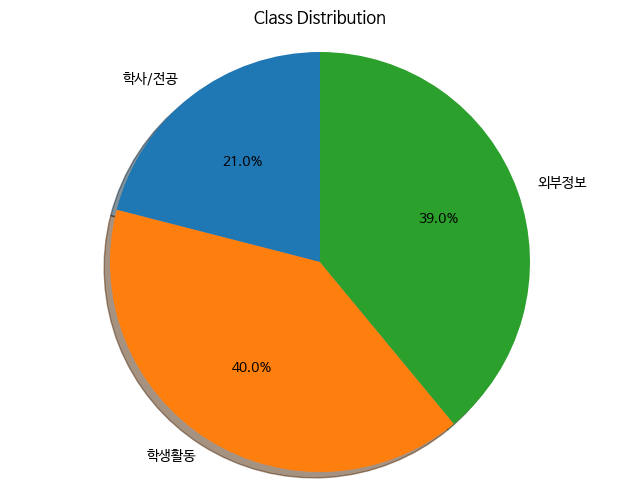


클래스: 학사/전공
1. re컴퓨터과학 재입학생입니다 옛 교재 사용가능할까요
2. 2024학년도 2학기의 주요 공지사항
3. 전공교재 팝니다
4. 2024학년 2학기 기말시험 관련
5. 컴퓨터과학 재입학생입니다 옛 교재 사용가능할까요

클래스: 학생활동
1. 함께하는 방송대 미라클모닝 1월 모집안내
2. 2025년 극예술연구회 신입회원 모집
3. 그로스로그 개발자 커뮤니티 3기 신입회원을 모집합니다 
4. 그로스로그 3기 2차 ot는 2월21일금 1930에 공덕역에서 열립니다
5. 컴퓨터 과학과 단톡방은 어디인가요

클래스: 외부정보
1.  그린컴퓨터 아카데미
2. 안내 dsa일본ict직무 취업기회와 cdp성장사례 세미나 홍보
3.  사회복지사 보육교사 평생교육사 한국어교원 과정 모집 온라인과정 
4. 과기부 주관sw개발자 대환영 ai반도체 기술인재 선발대회 모집830까지 지원가능
5. 서울지역 컴퓨터과학과 공식 카카오채팅방 강퇴 규정에 대해 문의드립니다


In [58]:
plot_class(cs_df)

In [30]:
def plot_stack(df):
  classes = ['전공', '동아리', '광고', '기타']
  # 클래스별 더미 변수 생성
  dummies = pd.get_dummies(df['class'], classes).reindex(columns=classes, fill_value=0)

  # 날짜별 누적 합계 계산
  cumulative = dummies.cumsum()

  # 인덱스를 X축으로 사용
  plt.stackplot(
      df.index,  # 게시글 순서 (과거=0, 최신=99)
      cumulative.T,
      labels=classes
  )
  plt.xlabel('Post Index (0=Oldest)')

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


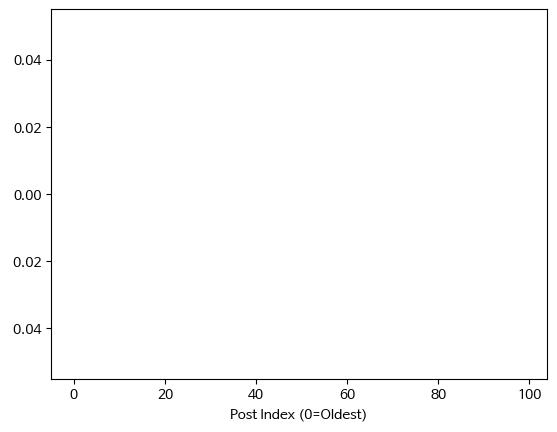

In [31]:
plot_stack(cs_df)

In [59]:
def classify_ko(title):
  return classify('국어국문학과', title)

ko_df['class_analysis'] = ko_df['제목'].apply(classify_ko)
ko_df['class'] = ko_df['class_analysis'].apply(get_class)

def classify_law(title):
  return classify('법학과', title)

law_df['class_analysis'] = law_df['제목'].apply(classify_law)
law_df['class'] = law_df['class_analysis'].apply(get_class)

Processed prompts: 100%|██████████| 1/1 [00:02<00:00,  2.06s/it, est. speed input: 90.36 toks/s, output: 24.77 toks/s]


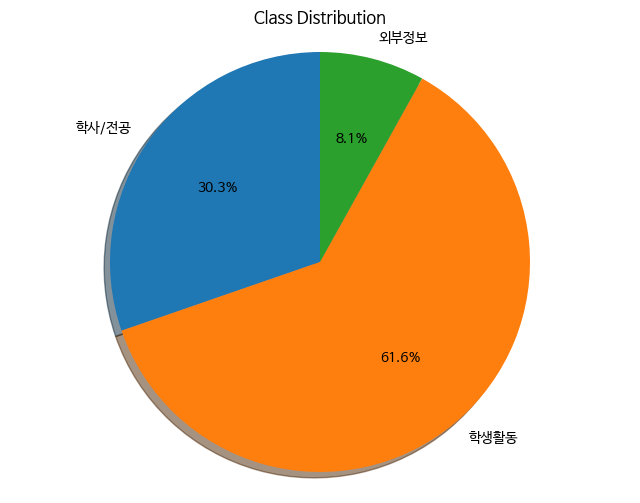


클래스: 학사/전공
1. 종로 라온하제  과제물 특강
2. 2025학년도 1학기 수강신청 신 구 시스템 병행운영 안내
3. 2025학년도 1학기 출석수업지역통합 화상강의 포함 시행 계획
4. 11학기 12학기 21학기 교재 판매합니다
5. 문우사랑 국어국문학과 전공과목인 국문학의 역사 특강안내

클래스: 학생활동
1.  공부만큼은 확실히 잡아주는 국어국문학과 명품 스터디 뚝섬스터디 
2. 연극 배우 및 스텝 모집중
3.  공부만큼은 확실히 잡아주는 국어국문학과 명품 스터디 뚝섬스터디 
4. 2025 종로 스터디 라온하제로 오세요
5.  국어국문학과 신편입생 ot 및 과제물작성법 무료 특강

클래스: 외부정보
1. re교재판매
2. 교재팝니다
3. 2025 방송대 합창단 신입단원 모집 
4. 교재 팝니다
5. re문화통합론과북한문학 책 팝니다


In [60]:
plot_class(ko_df)

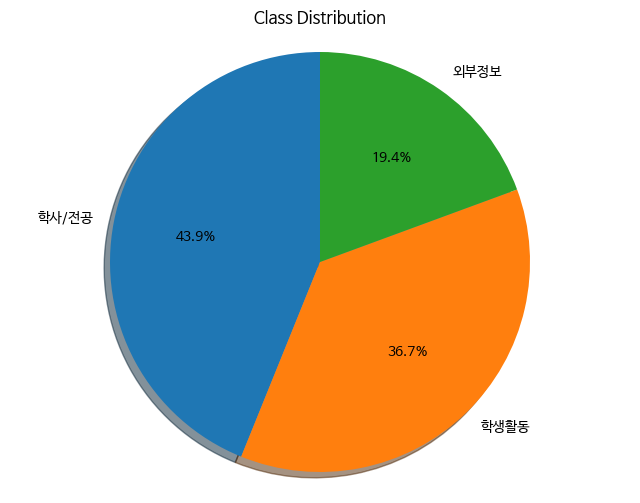


클래스: 학사/전공
1. re법학과 4학년 1학기 교재 삽니다
2. 교재 나눔
3. 법학과 1학년 1학기 교재 삽니다 
4. 노동법3 책 구합니다
5. 법학과 교재 판매

클래스: 학생활동
1. 25학번 신편입생 필독사항
2. 2025년 극예술연구회 신입회원 모집
3. 방송대 난타동아리 두드림 회원 을 모십니다 
4. 2025년 극예술연구회 신입회원 모집연극동아리
5. 함께하는 방송대 미라클모닝 1월 모집안내

클래스: 외부정보
1. 크로바 네이버 카페 
2. re노동법3 책 구합니다
3. 2025학년도 1학기 국가장학금 지원대상19구간 확대 안내
4. re직장내 괴롭힘 판례를 보려면 어디서 볼 수 있을까요
5. 2025 방송대 합창단 신입단원 모집 


In [61]:
plot_class(law_df)